In [1]:
import pandas as pd
import numpy as np

In [2]:
# %load get_data.py
def get_data() :
    
    import pandas as pd
    
    csv_beer = pd.read_csv("/home/grimoire/Projects/BeerRatings/beer_reviews.csv")
    beer_ratings = pd.DataFrame(csv_beer)
    
    return beer_ratings


In [3]:
beer_ratings = get_data()

## The purpose of this notebook will be to:
* Verify all values fall into appropriate ranges
* Update or remove bad values

In [4]:
beer_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [5]:
beer_ratings.beer_abv.unique()

array([  5.00000000e+00,   6.20000000e+00,   6.50000000e+00,
         7.70000000e+00,   4.70000000e+00,   3.50000000e+00,
         7.20000000e+00,   5.60000000e+00,   7.40000000e+00,
         5.50000000e+00,   5.80000000e+00,   8.10000000e+00,
         6.10000000e+00,              nan,   8.80000000e+00,
         5.70000000e+00,   7.00000000e+00,   6.30000000e+00,
         3.90000000e+00,   6.70000000e+00,   6.00000000e+00,
         6.80000000e+00,   5.40000000e+00,   9.50000000e+00,
         4.80000000e+00,   5.20000000e+00,   9.40000000e+00,
         7.60000000e+00,   8.50000000e+00,   4.00000000e+00,
         4.50000000e+00,   4.20000000e+00,   9.00000000e+00,
         8.00000000e+00,   4.10000000e+00,   1.04000000e+01,
         5.10000000e+00,   1.00000000e+01,   3.80000000e+00,
         7.10000000e+00,   4.60000000e+00,   7.50000000e+00,
         1.00000000e-01,   8.40000000e+00,   4.40000000e+00,
         4.90000000e+00,   2.20000000e+00,   2.80000000e+00,
         5.30000000e+00,

In [6]:
beer2 = beer_ratings

In [9]:
beer2['abv'] = beer2.beer_abv.astype(str)

In [15]:
len(beer2[beer2.abv =='nan'].beer_name.unique())

14110

In [19]:
max(beer2[beer2.abv !='nan'].beer_abv)

57.7

In [24]:
beer2[beer2[beer2.abv !='nan'] != 57.7].beer_abv.mean()

7.042353400114299

In [25]:
beer2[beer2.abv !='nan'].beer_abv.mean()

7.042386753208429

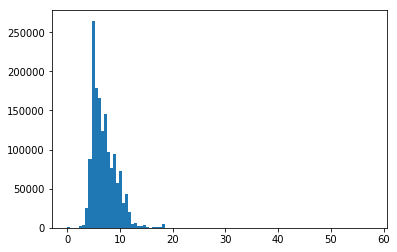

In [34]:
plt.hist(beer2[beer2.abv !='nan'].beer_abv, bins = 100)
plt.show()